In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data = pd.read_excel('Test Dataset.xlsx')

In [3]:
data['month'] = pd.to_datetime(data['month']).dt.strftime('%b-%Y')

In [4]:
data.head()

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,audio_start,audio_complete
0,Nov-2022,display,desktop,cpc,20,73.556544,58641,49,15468,6389,4,0,0,0,0
1,Nov-2022,display,desktop,cpc,75,227.396937,41074,168,7426,2679,13,0,0,0,0
2,Nov-2022,display,desktop,cpc,85,332.988521,303787,225,49079,26364,46,0,0,0,0
3,Nov-2022,display,desktop,cpc,86,55.406442,85832,45,6806,2568,1,0,0,0,0
4,Nov-2022,display,desktop,cpc,87,304.833211,239124,223,30268,13555,59,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10523 entries, 0 to 10522
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            10523 non-null  object 
 1   format           10523 non-null  object 
 2   device_type      10523 non-null  object 
 3   bid_type         10523 non-null  object 
 4   network_id       10523 non-null  int64  
 5   spend            10523 non-null  float64
 6   impressions      10523 non-null  int64  
 7   clicks           10523 non-null  int64  
 8   measurable_imps  10523 non-null  int64  
 9   viewable_imps    10523 non-null  int64  
 10  engagements      10523 non-null  int64  
 11  video_start      10523 non-null  int64  
 12  video_complete   10523 non-null  int64  
 13  audio_start      10523 non-null  int64  
 14  audio_complete   10523 non-null  int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.2+ MB


## 📊 Dataset Description

This dataset contains **digital advertising performance metrics** from a **Demand-Side Platform (DSP)**.  
Each record represents the performance of a campaign during a given month, segmented by several dimensions such as format, device type, bidding strategy, and network.

### 🧾 Columns Overview

| Column | Description | Marketing Relevance |
|---------|--------------|---------------------|
| `month` | Month and year of the campaign (e.g., Nov-2022). | Allows tracking performance trends over time. |
| `format` | Type of ad format (e.g., display, video, audio). | Helps identify which creative formats perform best. |
| `device_type` | Device where the ad was shown (desktop, mobile, tablet). | Reveals user engagement by device. |
| `bid_type` | Bidding strategy (e.g., CPC - cost per click, CPM - cost per thousand impressions). | Indicates how the ad space was purchased. |
| `network_id` | Identifier of the advertising network or publisher. | Used to compare performance across ad networks. |
| `spend` | Total amount spent on the campaign. | Represents investment and is essential for ROI calculation. |
| `impressions` | Number of times the ad was displayed. | Measures reach and visibility. |
| `clicks` | Number of user clicks on the ad. | Indicates direct user interest or engagement. |
| `measurable_imps` | Number of impressions that could be measured for viewability. | Used to evaluate measurable delivery quality. |
| `viewable_imps` | Number of impressions that were actually viewable. | Determines the real visibility rate of the campaign. |
| `engagements` | Number of additional user interactions (e.g., likes, shares, comments). | Reflects deeper engagement beyond clicks. |
| `video_start` | Number of times a video ad started playing. | Used to measure video ad engagement. |
| `video_complete` | Number of times a video ad was fully watched. | Helps assess video completion and retention. |
| `audio_start` | Number of times an audio ad started playing. | Indicates initial audio engagement. |
| `audio_complete` | Number of times an audio ad was fully listened to. | Measures audio ad completion rate. |

### 🎯 Purpose

The dataset is intended to evaluate **campaign effectiveness and efficiency** across different dimensions.  
It enables marketing teams to:

- Compare performance by **format**, **device**, **network**, and **bidding type**.
- Calculate key KPIs such as **CTR (Click-Through Rate)**, **CPC (Cost per Click)**, **CPM (Cost per Thousand Impressions)**, **Engagement Rate**, and **Viewability Rate**.
- Identify trends, outliers, and optimization opportunities.
- Provide **data-driven recommendations** to improve media allocation and creative strategies.

---



In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
# Calculated metrics by bid_type relevance

data['CPC'] = np.where(
    (data['bid_type'] == 'cpc') & (data['clicks'] > 0),
    data['spend'] / data['clicks'],
    np.nan
)

data['CPM'] = np.where(
    (data['bid_type'].isin(['cpm', 'cpcv'])),  # CPM y CPCV usan impresiones
    (data['spend'] / data['impressions']) * 1000,
    np.nan
)

data['CTR'] = np.where(
    (data['bid_type'].isin(['cpc', 'cpm', 'cpe'])) & (data['impressions'] > 0),
    (data['clicks'] / data['impressions']) * 100,
    np.nan
)

data['CPE'] = np.where(
    (data['bid_type'] == 'cpe') & (data['engagements'] > 0),
    data['spend'] / data['engagements'],
    np.nan
)

data['CPCV'] = np.where(
    (data['bid_type'] == 'cpcv') & (data['video_complete'] > 0),
    data['spend'] / data['video_complete'],
    np.nan
)

data['Viewability rate'] = np.where(
    (data['measurable_imps'] > 0),
    (data['viewable_imps'] / data['measurable_imps']) * 100,
    np.nan
)

data['Engagement rate'] = np.where(
    (data['bid_type'].str.lower() == 'cpe') & (data['impressions'] > 0),
    (data['engagements'] / data['impressions']) * 100,
    np.nan
)


In [8]:
data.isnull().sum()

month                  0
format                 0
device_type            0
bid_type               0
network_id             0
spend                  0
impressions            0
clicks                 0
measurable_imps        0
viewable_imps          0
engagements            0
video_start            0
video_complete         0
audio_start            0
audio_complete         0
CPC                 7987
CPM                 4528
CTR                  763
CPE                 9158
CPCV                9798
Viewability rate    3785
Engagement rate     8830
dtype: int64

In [9]:
#ver los nulos de viewability rate
data[data['Viewability rate'].isnull()]


,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
7,Nov-2022,display,desktop,cpc,106,66.322146,92302,43,0,0,...,0,0,0,1.542375,NaN,0.046586,NaN,NaN,NaN,NaN
8,Nov-2022,display,desktop,cpc,109,83.648473,137168,50,0,0,...,0,0,0,1.672969,NaN,0.036452,NaN,NaN,NaN,NaN
17,Nov-2022,display,desktop,cpc,135,0.494273,294,0,0,0,...,0,0,0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
28,Nov-2022,display,desktop,cpm,106,6899.712896,1559645,1022,0,0,...,0,0,0,NaN,4.423900,0.065528,NaN,NaN,NaN,NaN
29,Nov-2022,display,desktop,cpm,109,5604.036568,1423813,1290,0,0,...,0,0,0,NaN,3.935936,0.090602,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,Sep-2023,Audio,tablet-web,cpm,320,0.019207,2,0,0,0,...,0,2,2,NaN,9.603400,0.000000,NaN,NaN,NaN,NaN
10519,Sep-2023,Audio,unknown,cpm,320,0.004511,1,0,0,0,...,0,1,1,NaN,4.510533,0.000000,NaN,NaN,NaN,NaN
10520,Oct-2023,Audio,connected-device,cpm,320,0.005146,1,0,0,0,...,0,1,1,NaN,5.145933,0.000000,NaN,NaN,NaN,NaN
10521,Oct-2023,Audio,desktop,cpm,320,191.428420,10842,1,0,0,...,0,8930,5872,NaN,17.656191,0.009223,NaN,NaN,NaN,NaN


In [10]:
data.iloc[:, 5:].describe()

,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
count,10523.000000,1.052300e+04,10523.000000,1.052300e+04,1.052300e+04,10523.000000,1.052300e+04,1.052300e+04,1.052300e+04,1.052300e+04,2536.000000,5995.000000,9760.000000,1365.000000,725.000000,6738.000000,1693.000000
mean,1481.242333,3.416387e+05,873.575121,1.126309e+05,7.042636e+04,73.996009,2.451370e+04,1.849463e+04,4.235275e+03,3.869148e+03,1.199033,9.894599,0.325933,3.040745,0.043443,56.796988,0.086257
std,5613.754665,1.226492e+06,4371.443506,6.498037e+05,4.139628e+05,349.551071,2.101755e+05,1.679375e+05,5.051335e+04,4.582917e+04,0.543105,10.667255,1.537228,0.947957,0.022599,21.879411,0.176953
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.177738,0.133229,0.000000,0.849510,0.009942,0.000000,0.000000
25%,4.003509,1.821000e+03,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.801612,3.032428,0.026957,2.385404,0.026845,42.503951,0.004717
50%,49.474050,1.970600e+04,18.000000,4.300000e+02,2.140000e+02,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144750,4.820887,0.099492,2.871869,0.041024,56.314971,0.026048
75%,486.484779,1.507765e+05,212.000000,1.561150e+04,8.128500e+03,19.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.460190,14.297336,0.303525,3.609193,0.051057,71.859187,0.096680
max,205746.696705,2.827944e+07,136088.000000,1.525864e+07,9.637541e+06,12219.000000,7.839861e+06,5.908159e+06,1.532884e+06,1.500300e+06,6.080430,97.843950,88.888889,9.698554,0.149590,100.000000,3.734440


In [11]:
data[data['spend'] == 0]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
10306,Aug-2023,Audio,mobile-app,cpm,288,0.0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10308,Aug-2023,Audio,tablet-app,cpm,288,0.0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10312,Sep-2023,Audio,mobile-app,cpm,288,0.0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10314,Sep-2023,Audio,tablet-app,cpm,288,0.0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.drop(index=data[data['spend'] == 0].index, inplace=True)

In [13]:
data[data['impressions'] < data['clicks']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [14]:
data[data['impressions'] < data['measurable_imps']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
1012,Apr-2023,display,desktop,cpm,156,5.469885,925,1,2849,1511,...,0,0,0,NaN,5.913389,0.108108,NaN,NaN,53.036153,NaN
1104,Apr-2023,display,mobile-web,cpm,156,1.488300,252,0,810,429,...,0,0,0,NaN,5.905952,0.000000,NaN,NaN,52.962963,NaN
1177,Apr-2023,display,tablet-web,cpm,156,0.409230,68,0,237,167,...,0,0,0,NaN,6.018088,0.000000,NaN,NaN,70.464135,NaN
3915,Feb-2023,native,desktop,cpm,75,0.000325,1,0,4,0,...,0,0,0,NaN,0.324600,0.000000,NaN,NaN,0.000000,NaN
9060,May-2023,video,desktop,cpm,157,36.925860,4127,5,4294,2358,...,2011,0,0,NaN,8.947386,0.121153,NaN,NaN,54.913833,NaN


In [15]:
data.drop(index=data[data['impressions'] < data['measurable_imps']].index, inplace=True)

In [16]:
data[data['impressions'] < data['viewable_imps']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [17]:
data[data['impressions'] < data['engagements']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [18]:
data[data['measurable_imps'] < data['viewable_imps']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [19]:
data[data['measurable_imps'] < data['engagements']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
7,Nov-2022,display,desktop,cpc,106,66.322146,92302,43,0,0,...,0,0,0,1.542375,NaN,0.046586,NaN,NaN,NaN,NaN
8,Nov-2022,display,desktop,cpc,109,83.648473,137168,50,0,0,...,0,0,0,1.672969,NaN,0.036452,NaN,NaN,NaN,NaN
28,Nov-2022,display,desktop,cpm,106,6899.712896,1559645,1022,0,0,...,0,0,0,NaN,4.423900,0.065528,NaN,NaN,NaN,NaN
29,Nov-2022,display,desktop,cpm,109,5604.036568,1423813,1290,0,0,...,0,0,0,NaN,3.935936,0.090602,NaN,NaN,NaN,NaN
48,Nov-2022,display,mobile-app,cpc,106,362.068702,34690,274,0,0,...,0,0,0,1.321419,NaN,0.789853,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,Sep-2023,Audio,mobile-web,cpm,289,3927.102967,236000,1,0,0,...,0,234362,227709,NaN,16.640267,0.000424,NaN,NaN,NaN,NaN
10385,Sep-2023,Audio,tablet-app,cpm,289,256.867141,13369,10,0,0,...,0,13222,13031,NaN,19.213639,0.074800,NaN,NaN,NaN,NaN
10389,Oct-2023,Audio,desktop,cpm,289,3837.751296,240269,8,0,0,...,0,238761,233500,NaN,15.972728,0.003330,NaN,NaN,NaN,NaN
10390,Oct-2023,Audio,mobile-app,cpm,289,4067.166719,223993,42,0,0,...,0,220633,210021,NaN,18.157562,0.018751,NaN,NaN,NaN,NaN


In [20]:
data[data['audio_start'] < data['audio_complete']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [21]:
data[data['video_start'] < data['video_complete']]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


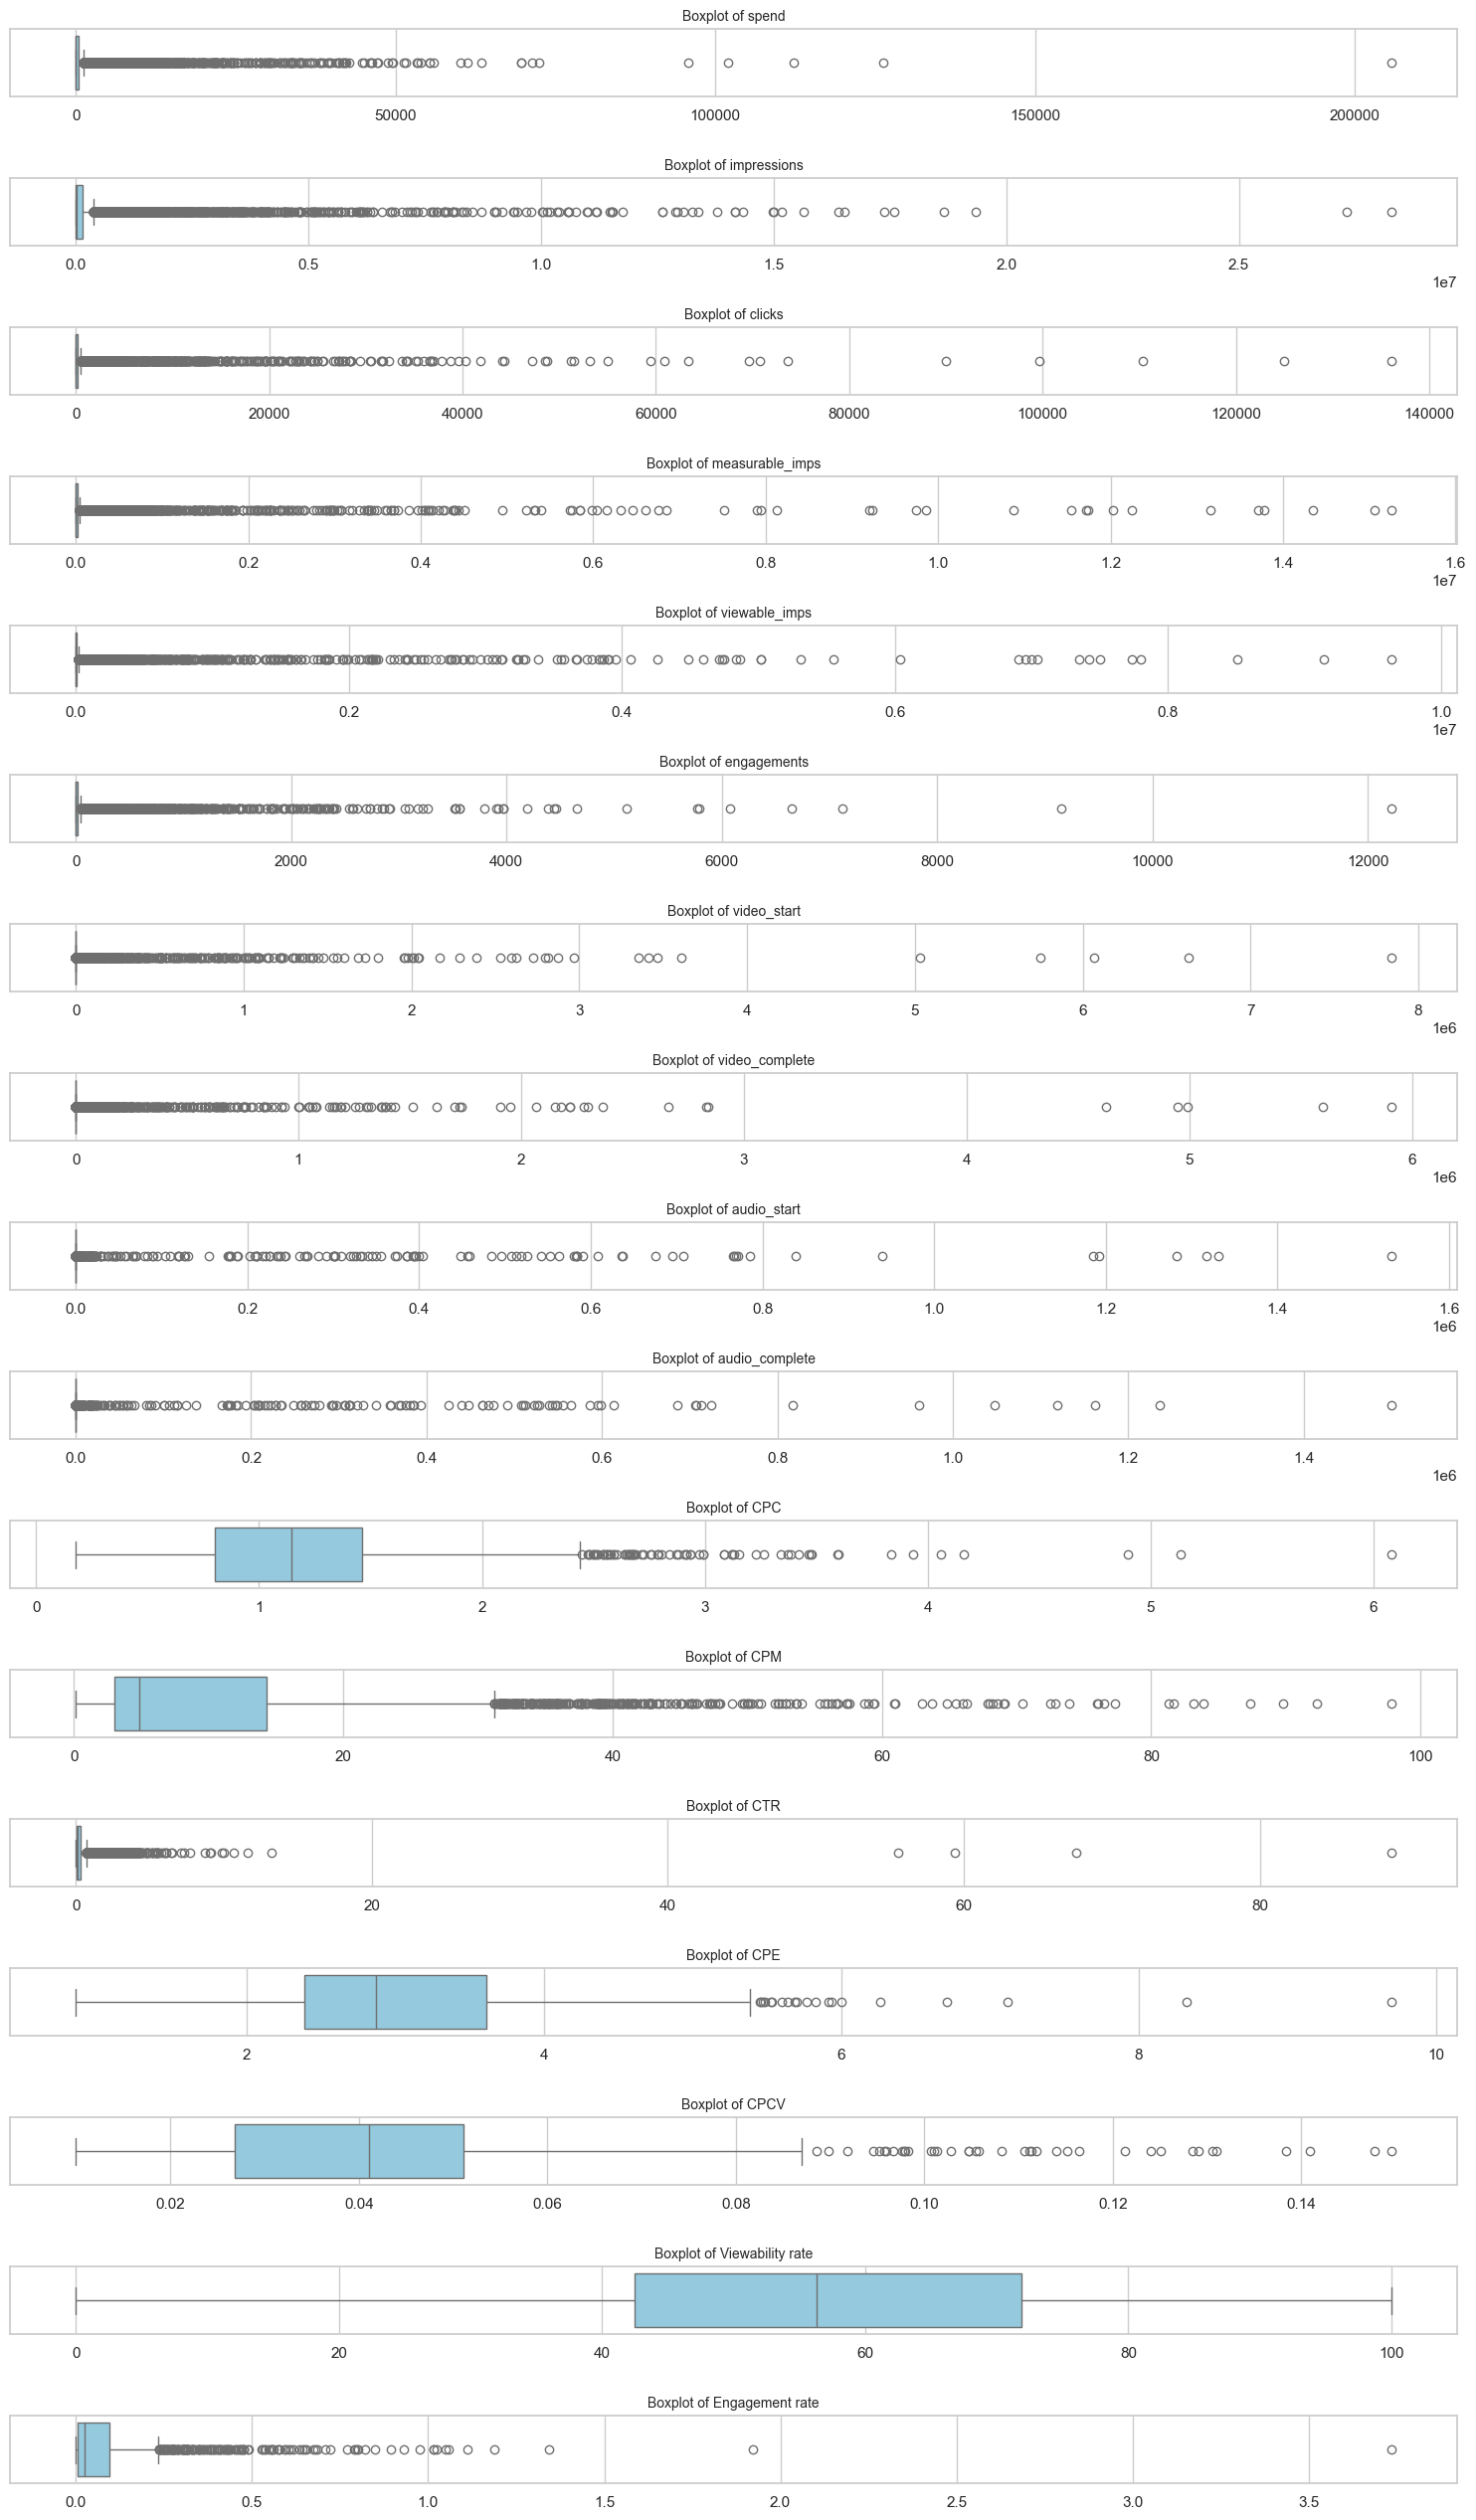

In [22]:
numeric_data = data.iloc[:, 5:].select_dtypes(include=['number'])

# Set a clean visual style
sns.set(style="whitegrid")

# Create boxplots for all numeric columns
def plot_outliers(df):
    """
    Create boxplots for all numeric columns to visualize potential outliers.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing numeric columns.
    """
    num_cols = df.columns
    num_plots = len(num_cols)
    
    # Adjust figure size dynamically based on the number of columns
    plt.figure(figsize=(15, num_plots * 1.5))
    
    for i, col in enumerate(num_cols, 1):
        plt.subplot(num_plots, 1, i)
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot of {col}", fontsize=10)
        plt.xlabel("")
        plt.tight_layout()
    
    plt.show()

# Plot all numeric columns
plot_outliers(numeric_data)


In [23]:
data[data['CPC']>= 60000]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [24]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['number'])))
outliers = (z_scores > 3)  # Common threshold: 3 standard deviations

print(f"Rows with high z-scores: {np.sum(outliers.any(axis=1))}")


Rows with high z-scores: 742


In [25]:
np.sum(outliers.any(axis=1))/len(data)*100

np.float64(7.057256990679095)

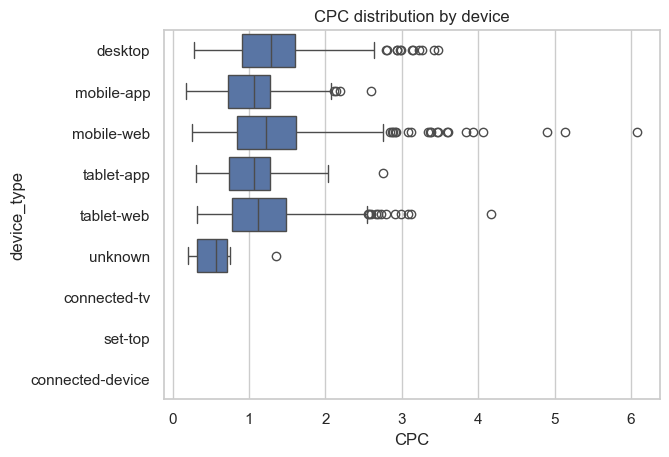

In [26]:
sns.boxplot(y='device_type', x='CPC', data=data)
plt.title("CPC distribution by device")
plt.show()


In [27]:
def get_extreme_outliers(df):
    """
    Identify the most extreme outliers in each numeric column based on IQR.
    
    Parameters:
        df (pd.DataFrame): Numeric DataFrame.
    
    Returns:
        dict: Dictionary containing top 5 extreme outliers for each column.
    """
    extremes = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter extreme values
        outliers_high = df[df[col] > upper_bound][col].sort_values(ascending=False)
        
        # Keep the top 5 most extreme values in each tail
        extremes[col] = {
            'high_outliers': outliers_high.head(5).values,
        }
    return extremes

# Get the most extreme outliers
extreme_outliers = get_extreme_outliers(numeric_data)

# Display results
for col, values in extreme_outliers.items():
    print(f"\n🔹 Column: {col}")
    print(f"  Highest outliers: {values['high_outliers']}")



🔹 Column: spend
  Highest outliers: [205746.696705 126277.85223  112312.97424  102072.736635  95795.85213 ]

🔹 Column: impressions
  Highest outliers: [28279438 27312529 19337034 18653647 17596208]

🔹 Column: clicks
  Highest outliers: [136088 124931 110397  99637  90027]

🔹 Column: measurable_imps
  Highest outliers: [15258642 15057114 14350784 13777899 13707743]

🔹 Column: viewable_imps
  Highest outliers: [9637541 9144006 8511634 7800618 7738082]

🔹 Column: engagements
  Highest outliers: [12219  9154  7123  6649  6076]

🔹 Column: video_start
  Highest outliers: [7839861 6631431 6068814 5746913 5029669]

🔹 Column: video_complete
  Highest outliers: [5908159 5597917 4991042 4947416 4626703]

🔹 Column: audio_start
  Highest outliers: [1532884 1331439 1317643 1282587 1191778]

🔹 Column: audio_complete
  Highest outliers: [1500300 1235802 1162832 1119361 1047818]

🔹 Column: CPC
  Highest outliers: [6.08043   5.132145  4.89708   4.1627625 4.058104 ]

🔹 Column: CPM
  Highest outliers: [9

In [28]:
data[(data['CPC'] > 10) & (~data['format'].isin(['Audio', 'video']))]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate


In [29]:
data['bid_type'].value_counts()

bid_type
cpm     5231
cpc     2831
cpe     1693
cpcv     759
Name: count, dtype: int64

In [30]:
data[data['CTR']>59]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
4952,Apr-2023,native,mobile-app,cpm,28,0.055395,9,8,0,0,...,0,0,0,NaN,6.155,88.888889,NaN,NaN,NaN,NaN
7208,Sep-2023,native,mobile-app,cpc,124,387.135030,1304,774,60,3,...,0,0,0,0.500174,NaN,59.355828,NaN,NaN,5.000000,NaN
7232,Sep-2023,native,mobile-app,cpe,124,1.356195,894,604,26,1,...,0,0,0,NaN,NaN,67.561521,1.356195,NaN,3.846154,0.111857


In [31]:
data[data['CPM']>92]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
8450,Jan-2023,video,mobile-web,cpcv,146,0.391376,4,0,0,0,...,4,0,0,NaN,97.84395,NaN,NaN,0.097844,NaN,NaN
8964,Apr-2023,video,tablet-app,cpcv,104,8.581110,93,0,0,0,...,62,0,0,NaN,92.27000,NaN,NaN,0.138405,NaN,NaN


In [32]:
data[data['impressions'] >= 17596208]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,...,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
1669,Jul-2023,display,mobile-web,cpm,85,41256.396675,18653647,21353,5227173,3127723,...,0,0,0,NaN,2.211707,0.114471,NaN,NaN,59.835842,NaN
1853,Aug-2023,display,mobile-web,cpm,85,42128.579025,19337034,19483,13777899,8511634,...,0,0,0,NaN,2.178647,0.100755,NaN,NaN,61.777445,NaN
2228,Oct-2023,display,mobile-web,cpm,85,53439.690840,17596208,16377,15258642,9637541,...,0,0,0,NaN,3.037000,0.093071,NaN,NaN,63.161197,NaN
7239,Sep-2023,native,mobile-app,cpm,4,72435.974850,27312529,136088,0,0,...,0,0,0,NaN,2.652115,0.498262,NaN,NaN,NaN,NaN
7705,Oct-2023,native,mobile-app,cpm,4,71309.881095,28279438,124931,0,0,...,0,0,0,NaN,2.521616,0.441773,NaN,NaN,NaN,NaN


In [33]:
df = data[['device_type'] + list(numeric_data.columns)]

def outliers(df, group_col='device_type', threshold=3):
    """
    Calculate the number of outliers per numeric column grouped by device type
    using the z-score method.
    """
    results = []

    for device, group in df.groupby(group_col):
        numeric_group = group.select_dtypes(include=['number'])
        z_scores = np.abs(stats.zscore(numeric_group, nan_policy='omit'))
        outlier_flags = (z_scores > threshold)

        # Convert to DataFrame to allow new columns
        outlier_counts = pd.DataFrame(outlier_flags.sum(axis=0)).T
        outlier_counts['total_outliers'] = outlier_counts.sum(axis=1)
        outlier_counts[group_col] = device

        results.append(outlier_counts)
    outlier_summary = pd.concat(results, ignore_index=True).set_index(group_col)
    outlier_summary.columns = list(numeric_data.columns) + ['total_outliers']
    return outlier_summary


# Run the function
outlier_summary = outliers(df)

outlier_summary.sort_values('total_outliers', ascending=False)


,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate,total_outliers
device_type,,,,,,,,,,,,,,,,,,
mobile-web,53,43,41,30,32,50,25,24,30,30,13,21,50,4,3,0,10,459
desktop,35,38,35,29,32,47,29,27,37,37,8,30,46,1,3,0,13,447
tablet-web,40,45,41,29,30,39,24,24,27,27,5,20,48,0,5,10,10,424
tablet-app,29,35,38,23,23,35,26,25,14,16,1,19,44,1,2,0,3,334
mobile-app,36,35,30,36,33,34,22,19,16,17,3,22,5,3,1,0,6,318
unknown,8,8,2,7,5,6,2,2,9,9,0,4,3,0,0,0,0,65
connected-tv,1,1,0,2,1,0,1,1,1,1,0,4,0,0,0,0,0,13
set-top,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4
connected-device,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df = data[['format'] + list(numeric_data.columns)]
outlier_format = outliers(df, group_col='format')
outlier_format.sort_values('total_outliers', ascending=False)

,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate,total_outliers
format,,,,,,,,,,,,,,,,,,
native,91,93,76,57,65,79,0,0,0,0,38,27,8,8,0,0,29,571
display,52,44,52,41,48,51,0,0,0,0,17,14,25,0,0,6,1,351
video,28,31,18,16,16,20,31,29,0,0,0,45,26,0,16,0,0,276
Audio,8,7,6,0,0,3,0,0,7,7,0,13,4,0,0,0,0,55
CTV,1,2,0,2,1,0,2,2,0,0,0,3,0,0,0,0,0,13


In [35]:
data.describe()

,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,audio_start,audio_complete,CPC,CPM,CTR,CPE,CPCV,Viewability rate,Engagement rate
count,10514.000000,10514.000000,1.051400e+04,10514.000000,1.051400e+04,1.051400e+04,10514.000000,1.051400e+04,1.051400e+04,1.051400e+04,1.051400e+04,2536.000000,5990.000000,9755.000000,1365.000000,725.000000,6733.000000,1693.000000
mean,100.641430,1482.506066,3.419306e+05,874.322332,1.127265e+05,7.048622e+04,74.059349,2.453425e+04,1.851027e+04,4.238901e+03,3.872460e+03,1.199033,9.898332,0.326077,3.040745,0.043443,56.804801,0.086257
std,54.835284,5615.990802,1.226976e+06,4373.239621,6.500736e+05,4.141349e+05,349.693954,2.102643e+05,1.680086e+05,5.053482e+04,4.584864e+04,0.543105,10.670617,1.537609,0.947957,0.022599,21.875839,0.176953
min,1.000000,0.000208,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.177738,0.133229,0.000000,0.849510,0.009942,0.000000,0.000000
25%,75.000000,4.028351,1.836750e+03,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.801612,3.032404,0.026992,2.385404,0.026845,42.501777,0.004717
50%,106.000000,49.754146,1.977200e+04,18.000000,4.315000e+02,2.140000e+02,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144750,4.819520,0.099502,2.871869,0.041024,56.324380,0.026048
75%,127.000000,486.716740,1.508992e+05,213.000000,1.563550e+04,8.156000e+03,19.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.460190,14.303860,0.303653,3.609193,0.051057,71.864558,0.096680
max,320.000000,205746.696705,2.827944e+07,136088.000000,1.525864e+07,9.637541e+06,12219.000000,7.839861e+06,5.908159e+06,1.532884e+06,1.500300e+06,6.080430,97.843950,88.888889,9.698554,0.149590,100.000000,3.734440


In [36]:
data.to_csv('cleaned_data.csv', index=False)